In [13]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import plotly.express as px


In [8]:
start_date = datetime.now() - pd.DateOffset(months = 3)
end_date = datetime.now()

In [6]:
tickers = ['AAPL','MSFT','NFLX','GOOG']

In [7]:
df_list = []

In [9]:
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    df_list.append(data)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
df = pd.concat(df_list, keys = tickers, names = ['Ticker', 'Date'])
print(df.head())

                         Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2023-05-15  173.160004  173.210007  171.470001  172.070007  171.837967   
       2023-05-16  171.990005  173.139999  171.800003  172.070007  171.837967   
       2023-05-17  171.710007  172.929993  170.419998  172.690002  172.457123   
       2023-05-18  173.000000  175.240005  172.580002  175.050003  174.813934   
       2023-05-19  176.389999  176.389999  174.940002  175.160004  174.923798   

                     Volume  
Ticker Date                  
AAPL   2023-05-15  37266700  
       2023-05-16  42110300  
       2023-05-17  57951600  
       2023-05-18  65496700  
       2023-05-19  55772400  


In [12]:
df = df.reset_index()
print(df.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-05-15  173.160004  173.210007  171.470001  172.070007   
1   AAPL 2023-05-16  171.990005  173.139999  171.800003  172.070007   
2   AAPL 2023-05-17  171.710007  172.929993  170.419998  172.690002   
3   AAPL 2023-05-18  173.000000  175.240005  172.580002  175.050003   
4   AAPL 2023-05-19  176.389999  176.389999  174.940002  175.160004   

    Adj Close    Volume  
0  171.837967  37266700  
1  171.837967  42110300  
2  172.457123  57951600  
3  174.813934  65496700  
4  174.923798  55772400  


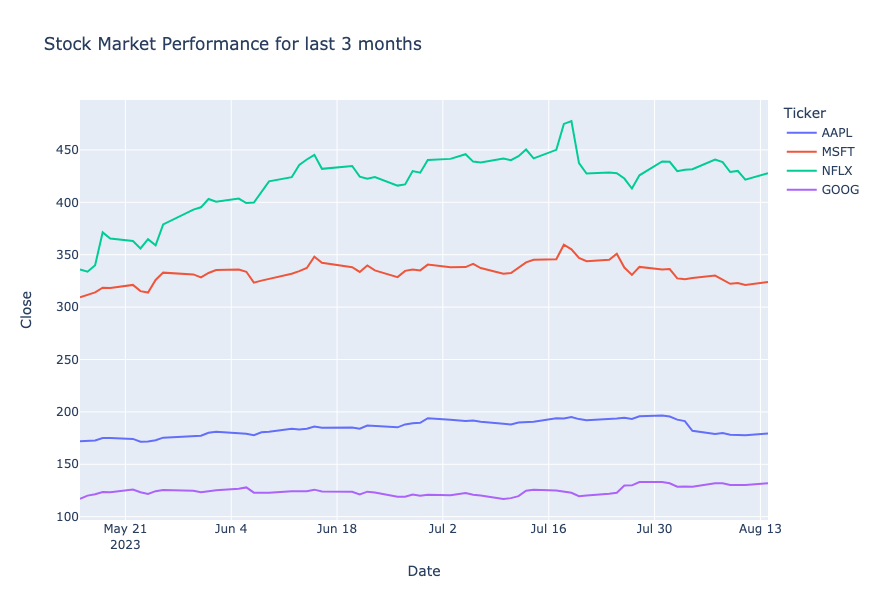

In [22]:

fi = px.line(df, x = 'Date',
            y = 'Close',
            color = 'Ticker',
            height = 600,
            width = 600,
            title = 'Stock Market Performance for last 3 months')
fi.show()

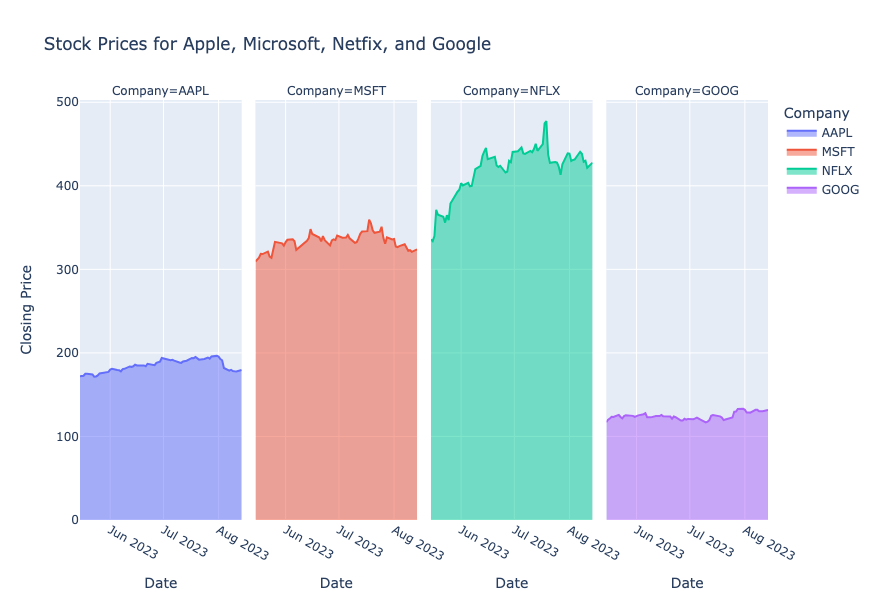

In [23]:
f = px.area(df,
           x='Date',
           y='Close',
           color = 'Ticker',
            height = 600,
            width = 600,
           facet_col = 'Ticker', 
           labels = {'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
           title = 'Stock Prices for Apple, Microsoft, Netfix, and Google')
f.show()

## Analysing moving averages of a company


### About moving avergaes:   
## A 10 day moving average would average out the closing prices of the stock for the first 10 days as the first datapoint, and the same follows for corresponding number of days

In [36]:
df["MA26"] = df.groupby("Ticker")['Close'].rolling(window = 26).mean().reset_index(0, drop = True)
df["MA12"] = df.groupby("Ticker")['Close'].rolling(window = 12).mean().reset_index(0, drop = True)
for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA12', 'MA26']])

Moving Averages for AAPL
          MA12        MA26
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
58  190.530834  191.085770
59  189.317501  190.536924
60  188.013335  190.023078
61  186.620834  189.483847
62  185.474168  189.052309

[63 rows x 2 columns]
Moving Averages for GOOG
           MA12        MA26
189         NaN         NaN
190         NaN         NaN
191         NaN         NaN
192         NaN         NaN
193         NaN         NaN
..          ...         ...
247  129.328332  125.103461
248  130.017499  125.472307
249  130.635832  125.763846
250  130.678332  126.119230
251  130.841666  126.568846

[63 rows x 2 columns]
Moving Averages for MSFT
           MA12        MA26
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
67          NaN         NaN
..          ...         ...
121  334.442497  338.77

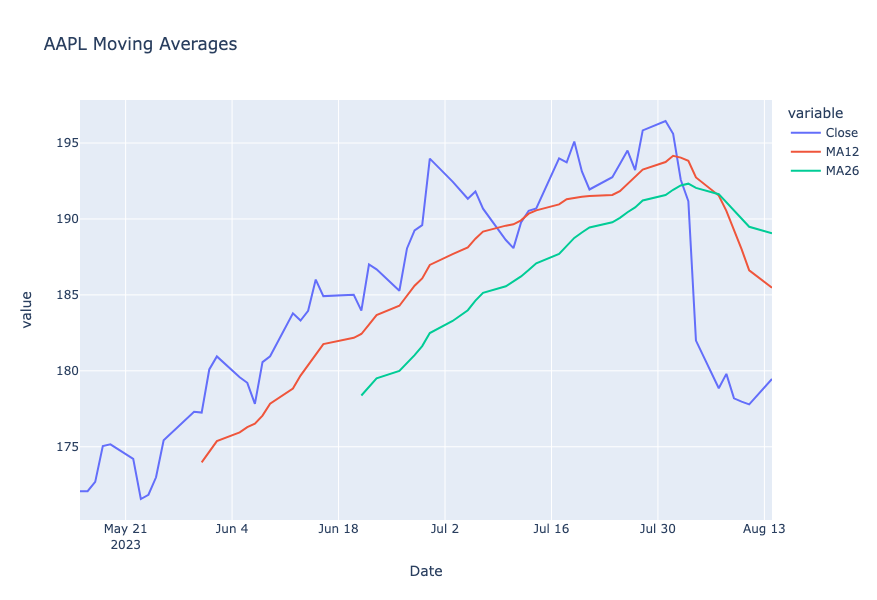

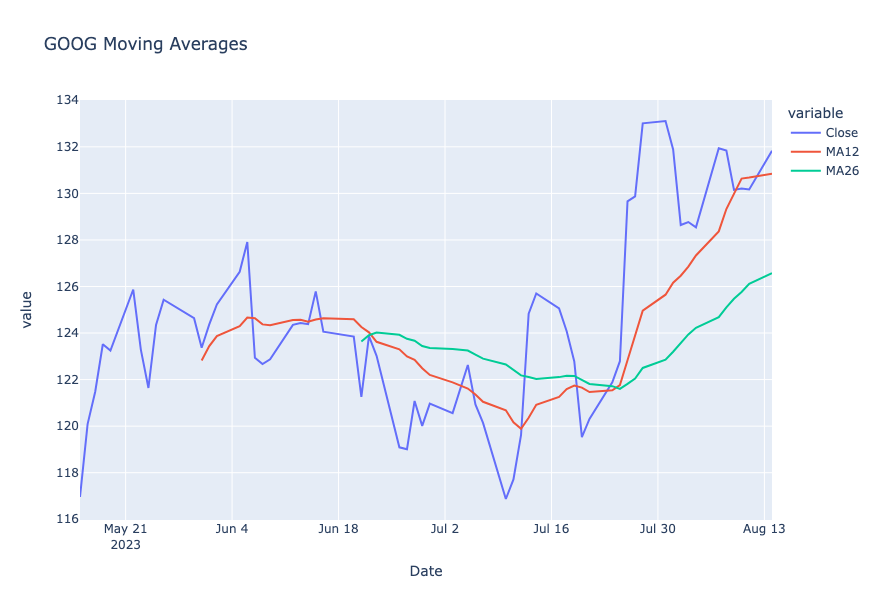

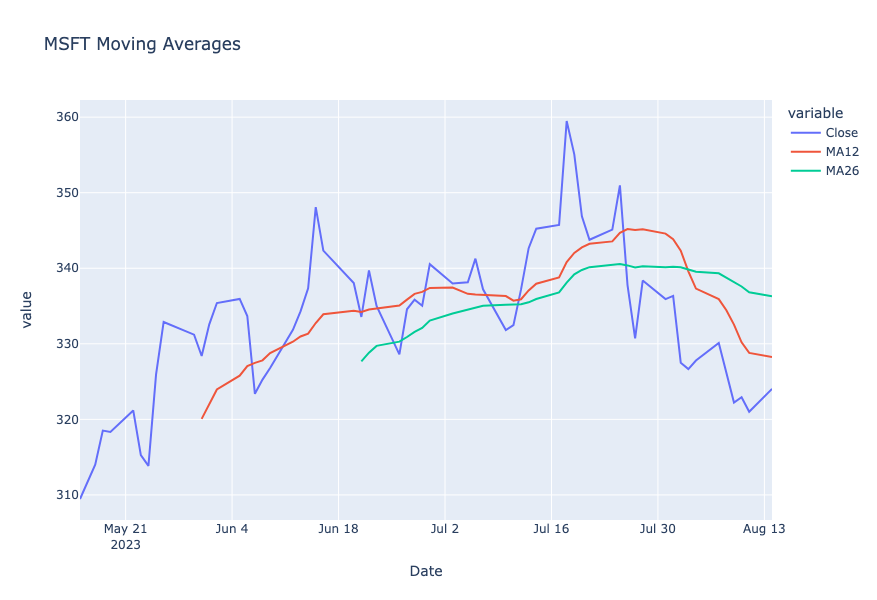

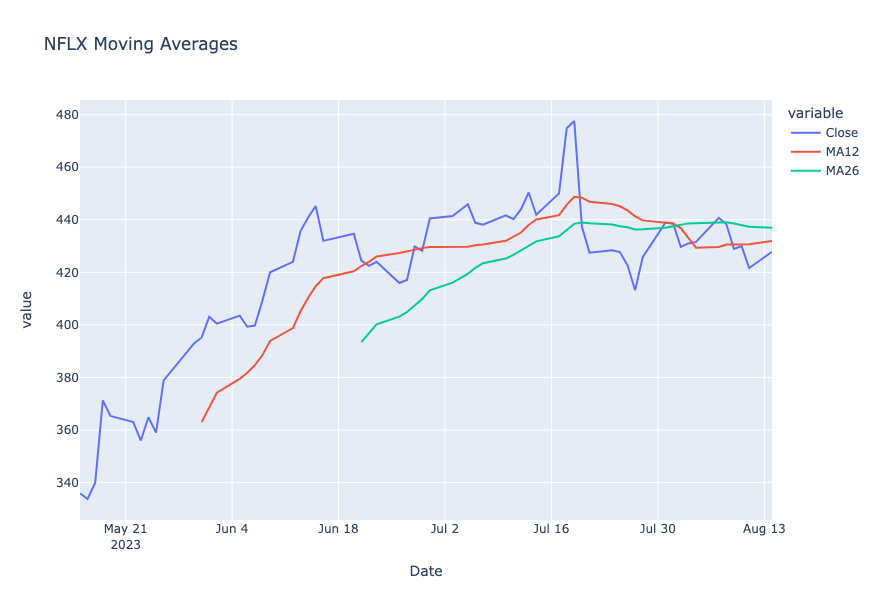

In [38]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x = 'Date',
                  y = ['Close','MA12','MA26'],
                  height = 600,
                  width = 800,
                  title = f"{ticker} Moving Averages")
    fig.show()
                  

## Moving Average Convergence Divergence: 

#### The moving avergae convergence divergence is used for assessing the relationship between two moving averages. We typically calculate it by finding the difference between the 26 day moving average and the 12 day moving average. 
#### When Moving Average 12 is generally higher than the moving average 26, then we can say that we see an indication of upward momentum (bullish signal), and vice versa (bearish signal).



## Volatility

#### We will now check the volatility of the stocks with respect to the companies. 
#### Volatility refers to the wild fluctuation in an index over a short period of time. Financial market regulations include buffers to limit volatility.

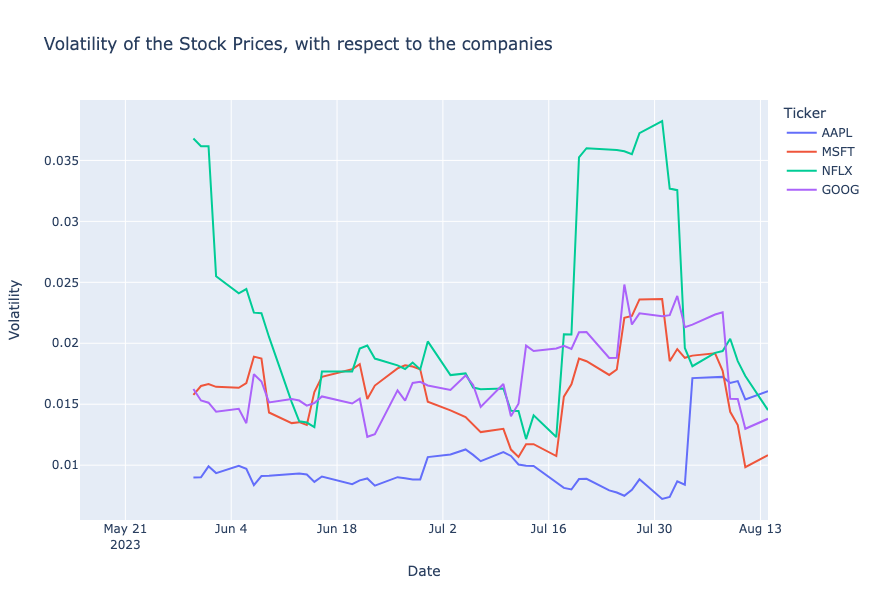

In [39]:
df['Volatility'] = df.groupby("Ticker")['Close'].pct_change().rolling(window =10).std().reset_index(0, drop = True)
fig = px.line(df, 
              x = 'Date',
              y = 'Volatility',
              height = 600,
              width = 600, 
              color = 'Ticker',
              title = "Volatility of the Stock Prices, with respect to the companies")
fig.show()

#### High Volatility indicates that the stock prices have been changing frequently, and the prices have been seeing frequent movement, and low volatility says that the prices have been seeing a less frequent movement, and have been stable for a stipulated duration of time. Here we see, that the red and blue lines that indicate Microsoft and Apple Stock prices respectively have the lowest volatility out of the four. 

#### We will further analyze by checking the correlation between the 2 companies

In [43]:
apple = df.loc[df['Ticker'] == 'AAPL', ['Date','Close']].rename(columns = {'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date','Close']].rename(columns = {'Close': 'MSFT'})
                   
df_corr = pd.merge(apple, microsoft, on= 'Date')


In [44]:
df_corr

,Date,AAPL,MSFT
0,2023-05-15,172.070007,309.459991
1,2023-05-16,172.070007,311.739990
2,2023-05-17,172.690002,314.000000
3,2023-05-18,175.050003,318.519989
4,2023-05-19,175.160004,318.339996
...,...,...,...
58,2023-08-08,179.800003,326.049988
59,2023-08-09,178.190002,322.230011
60,2023-08-10,177.970001,322.929993
61,2023-08-11,177.789993,321.010010


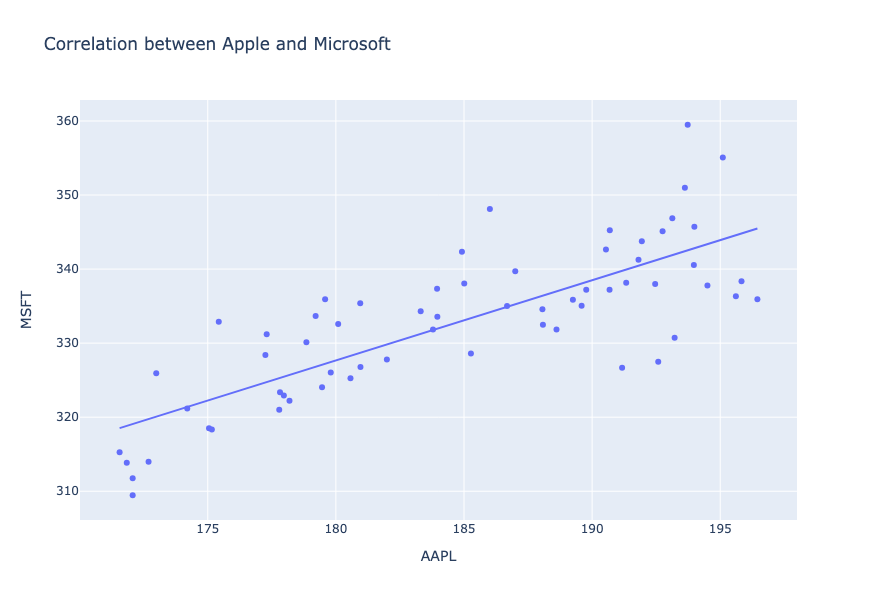

In [46]:
fig = px.scatter(df_corr, 
                 x = 'AAPL',
                 y = 'MSFT',
                 height = 600,
                 width = 600,
                 trendline = 'ols',
                 title = 'Correlation between Apple and Microsoft')
fig.show()

We see a strong linear relationship between the 2 stock prices. Furthermore, this is backed by residual analysis for the datapoints seem to be equally scattered above and below the trendline, and their vertical variance from the trendline also seems to be uniform across the left and right sides of the graph. Therefore, it satisfies the assumptions of error analysis too, and we can say that stock prices of the 2 companies are related.    
    
       
This correlation, contextually can be due to a myriad of reasons, some of which could include the similarity in industries, market conditions, common customers, investors, and business partners. For poeple who look forward to investing in these stocks, this may be an opportunity to diversify the portfolio by investing in both companies partially instead of investing all in one, as the stocks offer similar interests, returns and risks. 

